In [5]:
import pandas as pd
import numpy as np

In [6]:

df = pd.read_csv('data.csv')
df

,Brand,Model,Storage,RAM,Screen Size (inches),Camera (MP),Battery Capacity (mAh),Price ($)
0,Apple,iPhone 13 Pro,128,6,6.1,140.10,3095,999
1,Samsung,Galaxy S21 Ultra,256,12,6.8,274.80,5000,1199
2,OnePlus,9 Pro,128,8,6.7,142.70,4500,899
3,Xiaomi,Redmi Note 10 Pro,128,6,6.67,140.67,5020,279
4,Google,Pixel 6,128,8,6.4,142.40,4614,799
...,...,...,...,...,...,...,...,...
402,Samsung,Galaxy Note20 5G,128,8,6.7,142.70,4300,1049
403,Xiaomi,Mi 10 Lite 5G,128,6,6.57,140.57,4160,349
404,Apple,iPhone 12 Pro Max,128,6,6.7,140.70,3687,1099
405,Oppo,Reno3,128,8,6.4,142.40,4025,429


In [7]:
df.head()

,Brand,Model,Storage,RAM,Screen Size (inches),Camera (MP),Battery Capacity (mAh),Price ($)
0,Apple,iPhone 13 Pro,128,6,6.1,140.10,3095,999
1,Samsung,Galaxy S21 Ultra,256,12,6.8,274.80,5000,1199
2,OnePlus,9 Pro,128,8,6.7,142.70,4500,899
3,Xiaomi,Redmi Note 10 Pro,128,6,6.67,140.67,5020,279
4,Google,Pixel 6,128,8,6.4,142.40,4614,799


In [8]:
df.tail()

,Brand,Model,Storage,RAM,Screen Size (inches),Camera (MP),Battery Capacity (mAh),Price ($)
402,Samsung,Galaxy Note20 5G,128,8,6.7,142.70,4300,1049
403,Xiaomi,Mi 10 Lite 5G,128,6,6.57,140.57,4160,349
404,Apple,iPhone 12 Pro Max,128,6,6.7,140.70,3687,1099
405,Oppo,Reno3,128,8,6.4,142.40,4025,429
406,Samsung,Galaxy S10 Lite,128,6,6.7,140.70,4500,649


In [9]:
print('rows:', df.shape[0])
print('columns:', df.shape[1])


rows: 407
columns: 8


In [10]:
df.isnull().sum()


Brand                     0
Model                     0
Storage                   0
RAM                       0
Screen Size (inches)      0
Camera (MP)               0
Battery Capacity (mAh)    0
Price ($)                 0
dtype: int64

In [11]:

df = df.fillna(df.mode().iloc[0])


In [15]:
df.dtypes


Brand                      object
Model                      object
Storage                     int64
RAM                         int64
Screen Size (inches)       object
Camera (MP)               float64
Battery Capacity (mAh)      int64
Price ($)                  object
dtype: object

In [16]:
df.count()

Brand                     407
Model                     407
Storage                   407
RAM                       407
Screen Size (inches)      407
Camera (MP)               407
Battery Capacity (mAh)    407
Price ($)                 407
dtype: int64

In [17]:
df.describe()

,Storage,RAM,Camera (MP),Battery Capacity (mAh)
count,407.000000,407.000000,407.000000,407.000000
mean,123.046683,5.837838,135.320393,4676.476658
std,64.963160,2.431980,66.681004,797.193713
min,32.000000,2.000000,40.400000,1821.000000
25%,64.000000,4.000000,74.520000,4300.000000
50%,128.000000,6.000000,140.500000,5000.000000
75%,128.000000,8.000000,142.430000,5000.000000
max,512.000000,16.000000,534.900000,7000.000000


In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 407 entries, 0 to 406
Data columns (total 8 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Brand                   407 non-null    object 
 1   Model                   407 non-null    object 
 2   Storage                 407 non-null    int64  
 3   RAM                     407 non-null    int64  
 4   Screen Size (inches)    407 non-null    object 
 5   Camera (MP)             407 non-null    float64
 6   Battery Capacity (mAh)  407 non-null    int64  
 7   Price ($)               407 non-null    object 
dtypes: float64(1), int64(3), object(4)
memory usage: 25.6+ KB


In [20]:
np.sum(pd.isnull(df))

c:\Users\HAK3\anaconda3\Lib\site-packages\numpy\core\fromnumeric.py:86: FutureWarning: The behavior of DataFrame.sum with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return reduction(axis=axis, out=out, **passkwargs)


Brand                     0
Model                     0
Storage                   0
RAM                       0
Screen Size (inches)      0
Camera (MP)               0
Battery Capacity (mAh)    0
Price ($)                 0
dtype: int64

In [22]:
df["Brand"].unique()

array(['Apple', 'Samsung', 'OnePlus', 'Xiaomi', 'Google', 'Oppo', 'Vivo',
       'Realme', 'Motorola', 'Nokia', 'Sony', 'LG', 'Asus', 'Blackberry',
       'CAT', 'Huawei'], dtype=object)

In [24]:
num = df['Model'].mode()[0]
df['Model'] = df['Model'].fillna(num)


In [32]:
from sklearn.preprocessing import LabelEncoder

def changeobjtoint(cols):
    for i in cols:
        data = pd.DataFrame({i:df[i].unique()})
        data_LE = LabelEncoder()
        data_LE.fit(np.ravel(data))
        # data_LE.fit(data)
        df[i] = data_LE.transform(df[i])
columns = ['Brand','Model']
changeobjtoint(columns)
    

In [33]:
X = df.iloc[:, 0:-1]
X.shape
y = df.iloc[:, -1]
y.shape


(407,)

In [34]:
cat_columns = X.select_dtypes(['object']).columns
X[cat_columns] = X[cat_columns].apply(lambda x: pd.factorize(x)[0])

In [38]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import train_test_split
x = df.drop('Price ($)',axis=1) # with resultant column
y = df['Price ($)']    # with resultant column
X_train, X_test, Y_train, Y_test = train_test_split(x,y, test_size=.3, shuffle=False)

In [39]:
# Imports
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.naive_bayes import BernoulliNB, GaussianNB, MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier

# Assuming X and y are already defined
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Helper function to print metrics
def print_metrics(y_true, y_pred, classifier_name):
    acc = accuracy_score(y_true, y_pred)
    prec = precision_score(y_true, y_pred, average='weighted', labels=np.unique(y_pred))
    rec = recall_score(y_true, y_pred, average='weighted', labels=np.unique(y_pred))
    f1 = f1_score(y_true, y_pred, average='weighted', labels=np.unique(y_pred))
    print(f"\n{classifier_name} Metrics:")
    print(f"Accuracy: {acc:.4f}")
    print(f"Precision: {prec:.4f}")
    print(f"Recall: {rec:.4f}")
    print(f"F1 Score: {f1:.4f}")




In [41]:
# 1. BernoulliNB
BernNB = BernoulliNB()
BernNB.fit(X_train, Y_train)
Y_bpred = BernNB.predict(X_test)
print_metrics(Y_test, Y_bpred, "BernoulliNB")




BernoulliNB Metrics:
Accuracy: 0.0366
Precision: 0.0444
Recall: 0.6000
F1 Score: 0.0788


In [42]:
# 2. Random Forest
RF = RandomForestClassifier()
RF.fit(X_train, Y_train)
Y_rpred = RF.predict(X_test)
print_metrics(Y_test, Y_rpred, "Random Forest")




Random Forest Metrics:
Accuracy: 0.2073
Precision: 0.2025
Recall: 0.3148
F1 Score: 0.2331


c:\Users\HAK3\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [43]:
# 3. GaussianNB
GausNB = GaussianNB()
GausNB.fit(X_train, Y_train)
Y_gpred = GausNB.predict(X_test)
print_metrics(Y_test, Y_gpred, "GaussianNB")





GaussianNB Metrics:
Accuracy: 0.0610
Precision: 0.0543
Recall: 0.1163
F1 Score: 0.0687


c:\Users\HAK3\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [45]:
# 4. Decision Tree
Dtree = DecisionTreeClassifier()
Dtree.fit(X_train, Y_train)
Y_dpred = Dtree.predict(X_test)
print_metrics(Y_test, Y_dpred, "Decision Tree")




Decision Tree Metrics:
Accuracy: 0.1829
Precision: 0.1933
Recall: 0.2885
F1 Score: 0.2200


c:\Users\HAK3\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [46]:
# 5. MultinomialNB
MultiNB = MultinomialNB()
MultiNB.fit(X_train, Y_train)
Y_mpred = MultiNB.predict(X_test)
print_metrics(Y_test, Y_mpred, "MultinomialNB")



MultinomialNB Metrics:
Accuracy: 0.1220
Precision: 0.3030
Recall: 0.3125
F1 Score: 0.2646


c:\Users\HAK3\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [47]:

# 6. K-Nearest Neighbors
KNN = KNeighborsClassifier()
KNN.fit(X_train, Y_train)
Y_kpred = KNN.predict(X_test)
print_metrics(Y_test, Y_kpred, "KNN")


KNN Metrics:
Accuracy: 0.1341
Precision: 0.1681
Recall: 0.2340
F1 Score: 0.1774


c:\Users\HAK3\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))



Bernoulli Metrics:
Accuracy: 0.0366, Precision: 0.0444, Recall: 0.6000, F1: 0.0788


c:\Users\HAK3\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\HAK3\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\HAK3\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))



Random Forest Metrics:
Accuracy: 0.2073, Precision: 0.2025, Recall: 0.3148, F1: 0.2331

GaussianNB Metrics:
Accuracy: 0.0610, Precision: 0.0543, Recall: 0.1163, F1: 0.0687

Decision Tree Metrics:
Accuracy: 0.1829, Precision: 0.1933, Recall: 0.2885, F1: 0.2200


c:\Users\HAK3\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\HAK3\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))



MultinomialNB Metrics:
Accuracy: 0.1220, Precision: 0.3030, Recall: 0.3125, F1: 0.2646

KNN Metrics:
Accuracy: 0.1341, Precision: 0.1681, Recall: 0.2340, F1: 0.1774


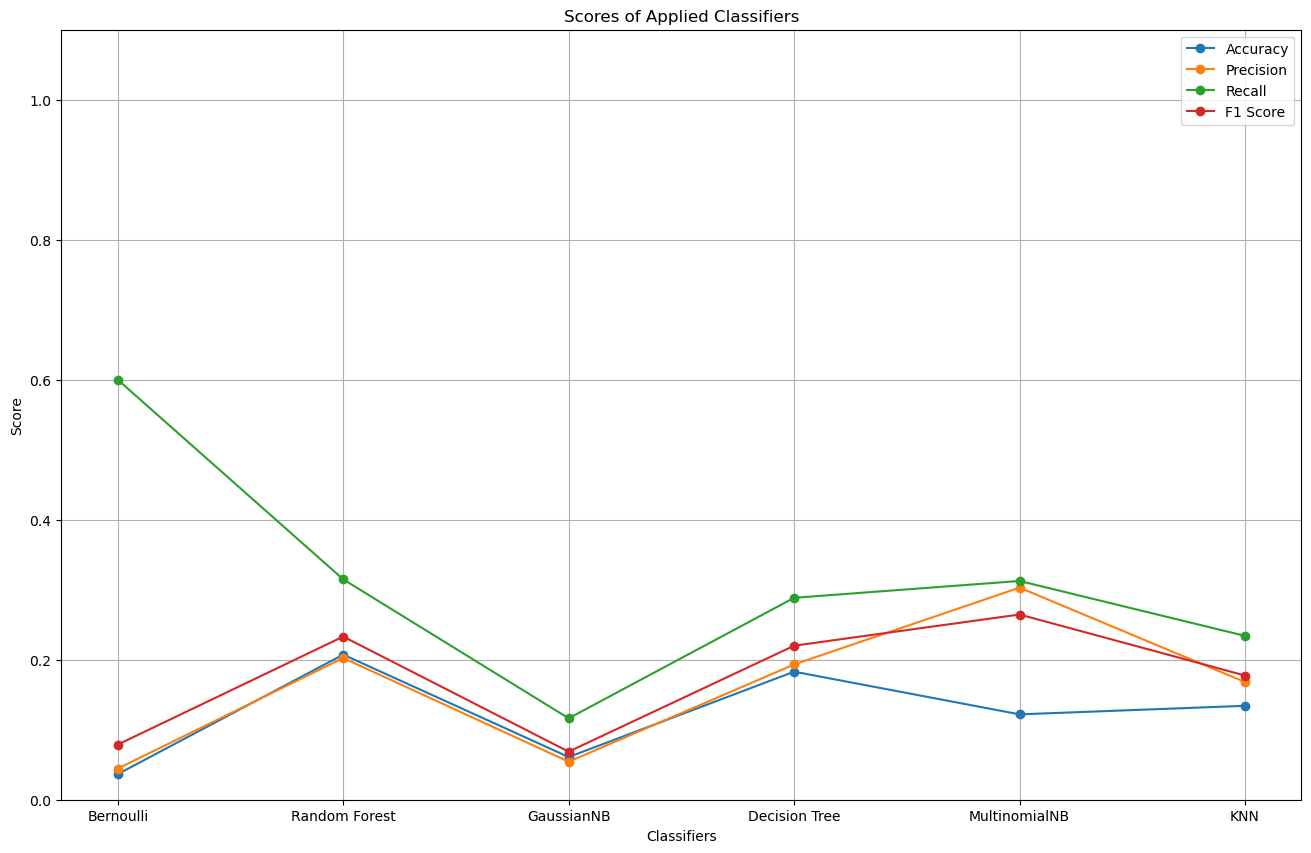

In [48]:
import matplotlib.pyplot as plt

# Dictionary to store metrics
metrics_dict = {}

# Helper function to store metrics
def store_metrics(y_true, y_pred, clf_name):
    acc = accuracy_score(y_true, y_pred)
    prec = precision_score(y_true, y_pred, average='weighted', labels=np.unique(y_pred))
    rec = recall_score(y_true, y_pred, average='weighted', labels=np.unique(y_pred))
    f1 = f1_score(y_true, y_pred, average='weighted', labels=np.unique(y_pred))
    metrics_dict[clf_name] = [acc, prec, rec, f1]
    print(f"\n{clf_name} Metrics:")
    print(f"Accuracy: {acc:.4f}, Precision: {prec:.4f}, Recall: {rec:.4f}, F1: {f1:.4f}")

# Train classifiers and store metrics
store_metrics(Y_test, BernNB.predict(X_test), "Bernoulli")
store_metrics(Y_test, RF.predict(X_test), "Random Forest")
store_metrics(Y_test, GausNB.predict(X_test), "GaussianNB")
store_metrics(Y_test, Dtree.predict(X_test), "Decision Tree")
store_metrics(Y_test, MultiNB.predict(X_test), "MultinomialNB")
store_metrics(Y_test, KNN.predict(X_test), "KNN")

# Plotting
plt.figure(figsize=(16,10))
classifiers = list(metrics_dict.keys())
scores = np.array(list(metrics_dict.values()))

plt.plot(classifiers, scores[:,0], marker='o', label='Accuracy')
plt.plot(classifiers, scores[:,1], marker='o', label='Precision')
plt.plot(classifiers, scores[:,2], marker='o', label='Recall')
plt.plot(classifiers, scores[:,3], marker='o', label='F1 Score')

plt.title("Scores of Applied Classifiers")
plt.xlabel("Classifiers")
plt.ylabel("Score")
plt.ylim(0, 1.1)
plt.legend()
plt.grid(True)
plt.show()


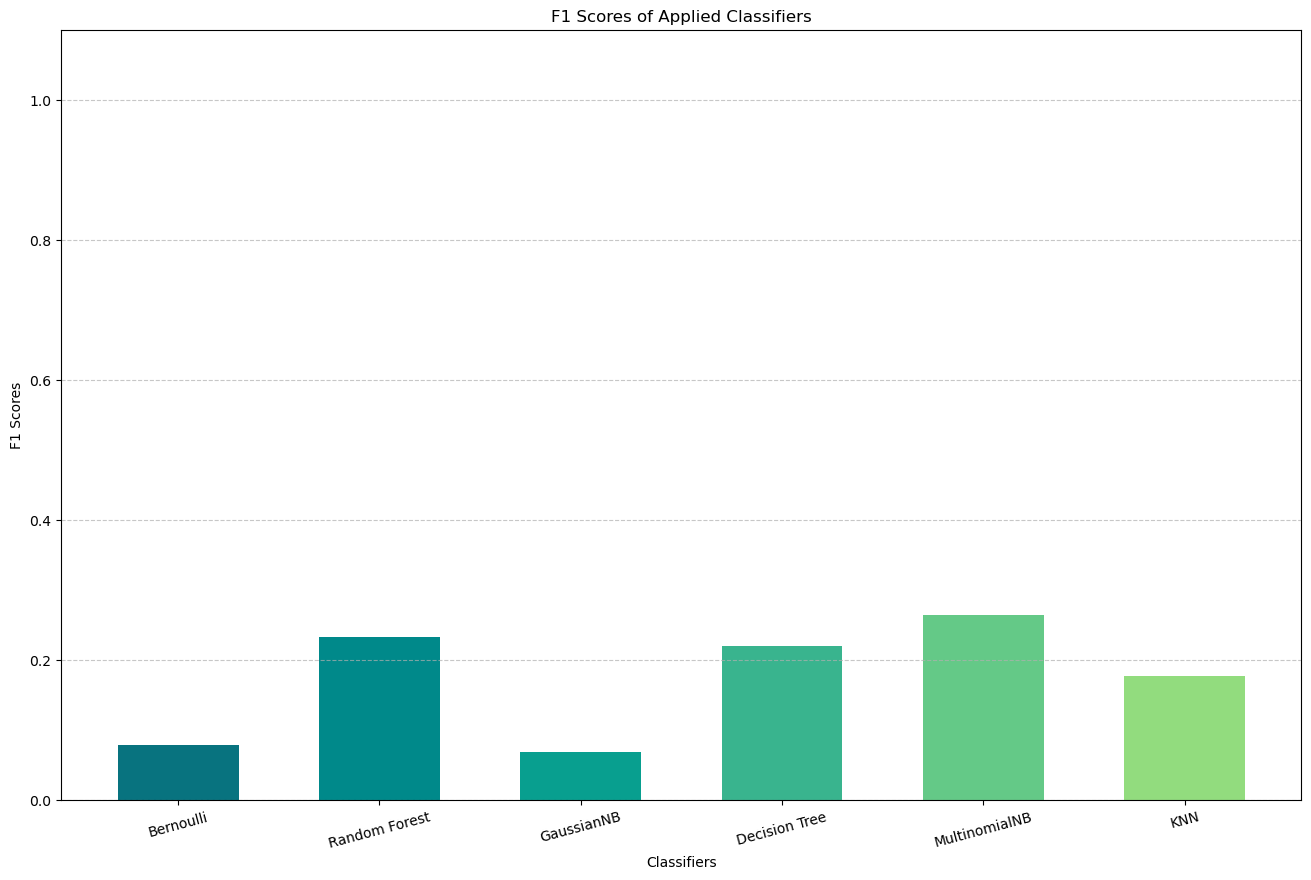

In [49]:
import matplotlib.pyplot as plt

# Extract classifiers and F1 scores from metrics_dict
classifiers = list(metrics_dict.keys())
f1_scores = [metrics_dict[clf][3] for clf in classifiers]  # F1 is the 4th metric

# x-coordinates for bars
x = np.arange(len(classifiers))

plt.figure(figsize=(16,10))
plt.bar(x, f1_scores, width=0.6, color=['#08737f', '#00898a', '#089f8f', '#39b48e', '#64c987', '#92dc7e'])
plt.xticks(x, classifiers, rotation=15)
plt.xlabel('Classifiers')
plt.ylabel('F1 Scores')
plt.title('F1 Scores of Applied Classifiers')
plt.ylim(0, 1.1)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

